In [237]:
# Mount Google Drive storage
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

In [239]:
# Check version of tensorflow to ensure compatibility
print(tf.__version__)

2.12.0


## **Load the dataset**

- Load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [240]:
# .h5 file stands for Hierarchical Data Format version 5
# .h5 store trained models in a serialized format
# .h5 file provides a hierarchical structure, which allows datasets to be organized in a tree-like structure
import h5py

In [241]:
# Write path of .h5 file stored in Google Drive
path = '/content/drive/MyDrive/Colab_Notebooks/SVHN_single_grey1.h5'

# Open the .h5 file
file = h5py.File(path, 'r')

In [242]:
# Explore .h5 file
for k_name in file.keys():
  print(k_name)

X_test
X_train
X_val
y_test
y_train
y_val


I see that there are six groups of data. I notice that there are already data groups for train and test.

In [243]:
# Explore X_train structure
data_Xtrain = file['X_train']
print(data_Xtrain)

<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">


I see the shape of X_train is a multi-dimensional array with three dimensions. 42000 is the number of images in the dataset, 32 is the number of rows in each image, 32 is the number of columns in each image. This is 32x32 pixels.

Additionally, I see that Xtrain is f4, which is a 32-bit floating point number, also known as single-precision floating-point number.
The letter f in f4 means "floating point", and the 4 is the number of bytes used to store each floating point.
f4 data type corresponds to numpy.float32

In [244]:
# Explore X_train content
print(data_Xtrain[()])

[[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  79.2865]]

 [[123.125  125.8581 122.0757 ... 123.5747 124.1186 123.3144]
  [121.1683 124.1294 117.4613 ... 115.6078 119.5751 122.8306]
  [124.6132 121.1019 109.6623 ... 111.1783 119.7923 124.7595]
  ...
  [135.1391 127.3679 117.754  ...  95.0919 105.5

The above output is an array of the pixel values of each image that belongs to the train group

In [245]:
# Explore X_val structure
data_Xval = file['X_val']
print(data_Xval)

<HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">


I see that X_val has a total of 60000 images. Each image is 32x32 pixels. The type is also f4, which corresponds to numpy.float32

In [246]:
# Explore X_train content
print(data_Xval[()])

[[[ 44.299   45.9999  51.3306 ...  25.2764  27.515   27.156 ]
  [ 49.1351  60.3081  70.1222 ...  23.7002  25.2378  24.2918]
  [ 60.7595  83.7141 102.1961 ...  24.5044  24.9712  22.8512]
  ...
  [ 67.1072  93.2464 109.2017 ...  26.6444  24.6015  22.9607]
  [ 24.7569  36.6417  48.9071 ...  21.9268  21.5309  21.5479]
  [ 22.6584  22.7724  27.2666 ...  21.443   20.8191  20.0812]]

 [[ 66.174   66.2772  67.5652 ...  63.1545  81.6751 103.6083]
  [ 69.8424  67.7178  66.3481 ...  55.8994  69.8935  93.4244]
  [ 67.8489  67.6532  66.2835 ...  57.3445  70.3495  92.7665]
  ...
  [ 70.7993  64.7613  62.652  ...  71.0335  94.8695 114.3038]
  [ 68.3094  64.4561  63.3036 ...  71.0335  94.3965 114.5318]
  [ 65.9182  65.7764  66.2925 ...  71.3324  94.3965 114.4178]]

 [[110.2584 107.0307 104.9169 ...  88.0649  86.478   85.7061]
  [108.5575 103.8569 102.629  ...  98.0639  97.064   96.477 ]
  [104.2698  99.1563  98.3413 ... 106.0631 106.476  107.7748]
  ...
  [104.7105 101.5367 100.1778 ... 122.0014 116.7

In the above output, I see the pixel values of each image that belongs to the group of X_val

In [247]:
# Explore structure of y_train
data_y_train = file['y_train']
print(data_y_train)

<HDF5 dataset "y_train": shape (42000,), type "|u1">


I see that in the y_train group is a one dimensional array. There are 42000 image labels. Each image label describes an image.

Additionally, I see that this group is |u1 type, which means it i unsigned 8-bit integer. This refers to numbers from 0 to 255. This data type corresponds to the numpy.uint8

In [248]:
# Explore content of y_train
for d_y in data_y_train[:20]:
  print(d_y)

2
6
7
4
4
0
3
0
7
3
1
0
1
3
1
1
0
0
8
4


In [249]:
# Determine unique labels of y_train
digits = []
for d_y in data_y_train:
  if d_y not in digits:
    digits.append(d_y)

print(sorted(digits))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


I see that labels of y_train group are one digit, ranging from 0 to 9.

In [250]:
data_y_val = file['y_val']
print(data_y_val)

<HDF5 dataset "y_val": shape (60000,), type "|u1">


I see that y_val group has 60000 labels. This group is |u1 type, which corresponds to numpy.uint8

In [251]:
# Explore content of y_val
for d_v in data_y_val[10000:10020]:
  print(d_v)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [252]:
# Determine unique labels of y_val
digits_v = []

for d_v in data_y_val:
  if d_v not in digits_v:
    digits_v.append(d_v)

print(sorted(digits_v))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


I see that y_val group has one digit labels and they range from 0 to 9.

In [253]:
# Explore structure of X_test
data_X_test = file['X_test']
print(data_X_test)

<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">


I see that X_test group has 18000 images. Each image is 32x32 pixels. They are type f4, which corresponds to numpy.float32.

In [254]:
# Explore X_test content
print(data_X_test[()])

[[[ 40.558   46.7917  48.9764 ... 112.1153 112.9904 112.1646]
  [ 39.4379  44.2911  47.1768 ... 111.0122 110.9475 109.9368]
  [ 38.4488  43.6394  48.7098 ... 109.8921 109.9414 109.1048]
  ...
  [ 34.9869  35.4707  39.6676 ... 109.211  109.9074 112.7346]
  [ 35.6602  35.5462  40.3193 ... 110.9998 112.049  114.3431]
  [ 36.1871  35.4214  40.6998 ... 110.0169 111.2017 114.1906]]

 [[115.1609 114.161  113.1611 ... 112.0302 112.6711 112.7851]
  [110.5743 110.2754 108.9766 ... 106.1448 106.7857 107.0137]
  [102.8031 102.5042 101.7924 ...  95.776   95.531   95.645 ]
  ...
  [169.8457 170.6176 167.8028 ...  45.1708  55.6967  62.81  ]
  [157.7329 157.6189 153.8042 ...  42.9538  50.1811  56.1805]
  [150.3207 149.2068 144.8051 ...  42.1388  48.2522  53.2517]]

 [[133.255  134.7279 136.3148 ... 103.7248 100.8391 100.6111]
  [134.2549 135.8418 138.3146 ... 117.1965 114.1968 114.0828]
  [136.2547 135.9558 137.4287 ... 126.8535 123.7398 123.4409]
  ...
  [135.4136 133.4847 131.2569 ... 129.0552 131.6

In the above output I see the pixel values for each image that belongs to the X_test group.

In [255]:
# Explore structure of y_test
data_y_test = file['y_test']
print(data_y_test)

<HDF5 dataset "y_test": shape (18000,), type "|u1">


I see that y_test has 18000 labels. They are type |u1, which corresponds to numpy.uint8.

In [256]:
# Explore X_test content
for d_t in data_y_test[10000:10020]:
  print(d_t)

4
3
8
0
0
6
5
9
7
9
6
7
1
4
5
7
2
0
0
0


In [257]:
# Determine unique labels of y_test
digits_t = []

for d_t in data_y_test:
  if d_t not in digits_t:
    digits_t.append(d_t)

print(sorted(digits_t))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


I see that y_test group has one digit labels that range from 0 to 9.

In [258]:
# Get list of key names
file_keys = list(file.keys())
file_keys

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [259]:
# Split dataset into train and test and format it into arrays
X_test = np.array(file['X_test'])
y_test = np.array(file['y_test'])
X_train = np.array(file['X_train'])
y_train = np.array(file['y_train'])

In [260]:
# Close the file
file.close()

Check the number of images in the training and the testing dataset.

In [261]:
X_train.shape

(42000, 32, 32)

In [262]:
y_train.shape

(42000,)

In [263]:
X_test.shape

(18000, 32, 32)

In [264]:
y_test.shape

(18000,)

**Observation:**

*   The first dimension of X_train is 42000, which denotes the number of images in the training data. Each image is stacked on top of the other, making it a 3-dimensional numpy array.
*   In the X_train, the second and third dimensions 32 and 32 denote the number of pixels along the height and width of the 2-dimensional image.
*   The y_train has 42000 image labels.
*   In X_test, the first dimension 18000 denotes the number of images in the training data, and each image is stacked on top of the other, making it a 3-dimensional numpy array.
*   In the X_test, the second and third dimensions 32,32 denote the number of pixels along the height and width of the 2-dimensional image.
*   In the y_test, there are 18000 labels
*   The number of labels and images in the training datasets is the same. The same applies to the testing dataset.




## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

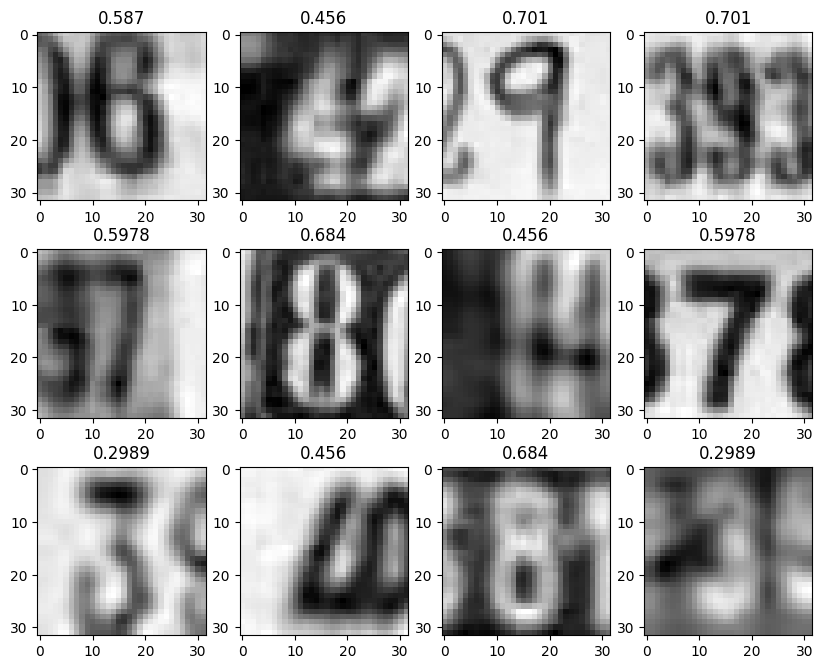

In [265]:
num_classes=10                                                                  # Number of Classes
categories=np.unique(X_train)                                                   # Obtaing the unique classes from y_train
rows = 3                                                                        # Defining number of rows=3
cols = 4                                                                        # Defining number of columns=4
fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))                       # Generating random indices from the data and plotting the images
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
        ax.imshow(X_train[random_index, :], cmap=plt.get_cmap('gray'))          # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[random_index]])
plt.show()

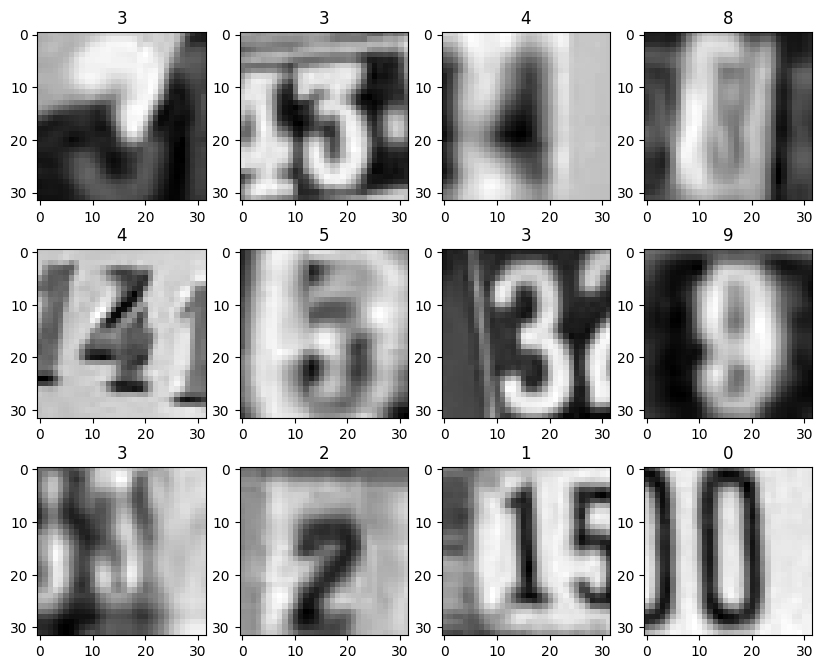

In [266]:
num_classes=10                                                                  # Number of Classes
categories=np.unique(y_train)                                                   # Obtaing the unique classes from y_train
rows = 3                                                                        # Defining number of rows=3
cols = 4                                                                        # Defining number of columns=4
fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))                       # Generating random indices from the data and plotting the images
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
        ax.imshow(X_train[random_index, :], cmap=plt.get_cmap('gray'))          # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[random_index]])
plt.show()

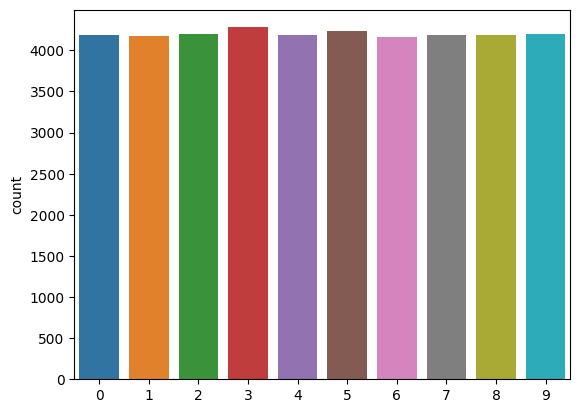

In [267]:
# Plot distribution of each category
count_plot = sns.countplot(x=y_train)

In the above plot, I see that there is about 4000 images in each label group. Dataset seems to be relatively balanced.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [268]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [269]:
y_train[0]

2

In [270]:
# Reshape dataset to fit model architecture
X_train = X_train.reshape((X_train.shape[0], 1024))
X_test = X_test.reshape((X_test.shape[0], 1024))

In [271]:
# Print type and new shape of dataset
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(42000, 1024)


In [272]:
# Print type and new shape of dataset
print(type(X_test))
print(X_test.shape)

<class 'numpy.ndarray'>
(18000, 1024)


### **Normalize the train and the test data**

In [273]:
# Normalizing using the scaling method since image pixel values range from 0 to 255
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Print the shapes of Training and Test data

In [274]:
# Print shape of normalized training data
print(X_train_normalized.shape)

(42000, 1024)


In [275]:
# Print shape of normalized test data
print(type(X_test_normalized))
print(X_test_normalized.shape)

<class 'numpy.ndarray'>
(18000, 1024)


**Observation:**
Datasets are normalized because we want to reduce the chances of getting stuck at local optima. When we normalize, we help avoid the vainishing/exploding gradient problem, which happens when very small or large error accumulates, causing very small or large updates to neural network model weights during the training process. It also makes the training go faster.

### **One-hot encode output**

In [276]:
# Creating one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_train_encoded.shape

(42000, 10)

In [277]:
# Creating one-hot encoded representation of target labels
y_test_encoded = tf.keras.utils.to_categorical(y_test)
y_test_encoded.shape


(18000, 10)

**Observation:**
The one-hot encoded representation for the target classes was created because the output layer should have 10 neurons that will provide the probabilities of the input image being part of those 10 classes.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

Fix the seed for random number generators

In [278]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

We set the seed for random number generator to ensure we can reproduce same results every time we run the code

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [279]:
def nn_model_1():
  # Intializing a sequential model
  # Create an instance of a Sequential model in Keras
  # Sequential model is a linear stack of layers that is suitable for building feedforward neural networks
  # In this step a blank canvas is created for constructing the neural netowrk
  ann_model = Sequential()

  # First hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
  # This adds a dense layer to the Sequential model previously created
  # ReLU activation function introduces non-linearity
  # Input shape is one-dimensional array with 1024 elements. This is only specified in first layer
  ann_model.add(Dense(64, activation='relu', input_shape=(1024, )))

  # Second hidden layer with 32 nodes and the relu activation
  ann_model.add(Dense(32, activation='relu'))

  # Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
  # Softmax function is used because it is multi-class classification problems.
  # Softmax function transforms the raw model outputs into a probability distribution over multiple classes
  # Softmax function ensures the sum of all probabilities in the output vector is equal to 1
  ann_model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  # Adaptive Moment Estimation (Adam) is an adaptive algorithm used to train neural networks
  # Adam efficiently and effectively update the network weights during training
  # The smaller the learning rate parameter, the slower convergence, but it may result on more accurate weight updates
  # The larger the learning rate parameter, leads to fater convergence, but it risks overshooting the optimal solution
  opt = Adam(learning_rate=0.001)

  # Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
  # Categorical crossentropy is commonly used when target variable has multiple classes and each sample belongs to only one class
  # Accuracy parameter measures the percentage of correctly classified samples out of the total samples
  ann_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return ann_model


In [280]:
  # Call the nn_model_1 function and store the model in a new variable
  ann_model = nn_model_1()

  # Generating the summary of the model
  ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [281]:
# Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20.
# Store the model building history to use later for visualization
# Epochs specifies the number of times the model will iterate over the entire training dataset duirng the trainign process
# Shuffling the data can help in better generalization and prevent the model from memorizing the order of the data
# Training data will be divided into batches of size 128. Model will update its weights after processing each batch
# Verbose 1 means that progress updates will be printed to the console for each epoch. If it were zero, no progress updates will be printed

history_nn1 = ann_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            shuffle=True,
            batch_size=128,
            verbose=1
)

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2966 - accuracy: 0.1149 - val_loss: 2.2563 - val_accuracy: 0.1470
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.1132 - accuracy: 0.2275 - val_loss: 1.9753 - val_accuracy: 0.3154
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.9138 - accuracy: 0.3293 - val_loss: 1.8557 - val_accuracy: 0.3582
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.8125 - accuracy: 0.3811 - val_loss: 1.7706 - val_accuracy: 0.4001
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.7037 - accuracy: 0.4256 - val_loss: 1.6556 - val_accuracy: 0.4427
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.5946 - accuracy: 0.4629 - val_loss: 1.5464 - val_accuracy: 0.4857
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.5175 - accuracy: 0.4941 - val_loss: 1.5090 - val_accuracy: 0.4979
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

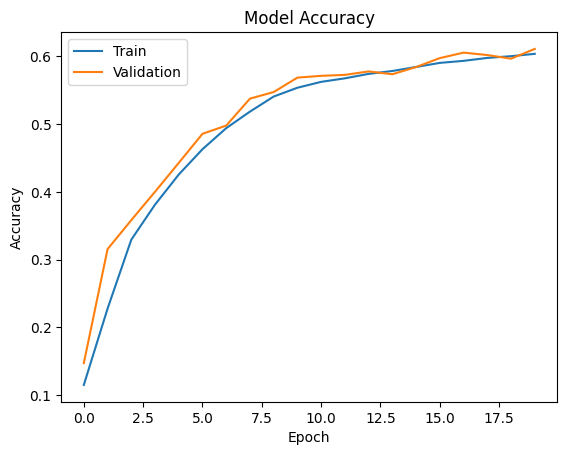

In [282]:
# Plotting the accuracies
plt.plot(history_nn1.history['accuracy'])

plt.plot(history_nn1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

I can see from the above plot that the model has not perform very well on the train and validation data with an accuracy of approximately 60%

In [283]:
# Evaluating the model on the test data
accuracy_nn1 = ann_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)


563/563 - 1s - loss: 1.2187 - accuracy: 0.6079 - 1s/epoch - 2ms/step


I see in the above output that it took 2 seconds to process one epoch. After processing all batches, we got a loss score of 1.22. The model correctly predicted 60.79% of the training samples. It took approximately 1 seconds on average to process one epoch. It took 2 milliseconds to process one mini-batch.

In [284]:
# Generating the Predictions using the test data
y_pred_nn1=ann_model.predict(X_test_normalized)

# Convert raw model predictions of y_pred into class labels for multi-class classification
y_pred_nn1_arg=np.argmax(y_pred_nn1,axis=-1)

563/563 [==============================] - 1s 1ms/step


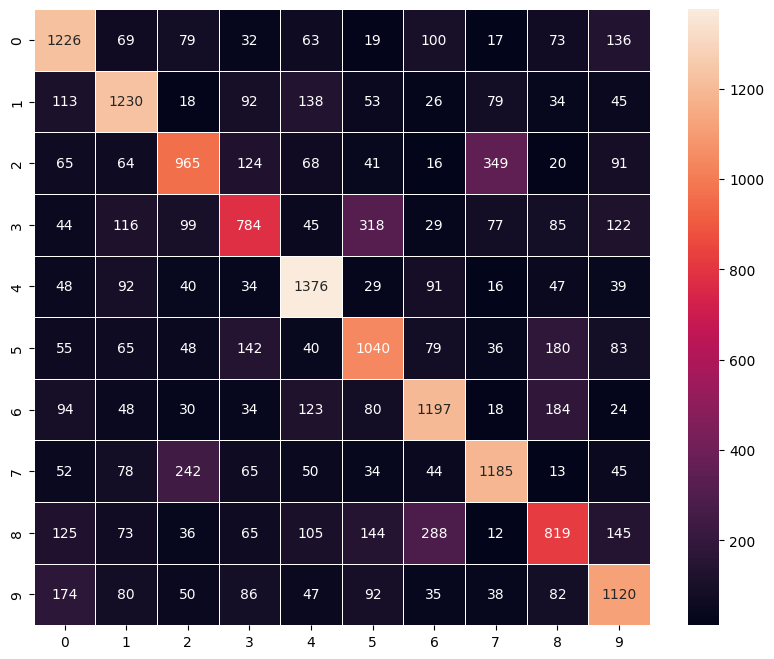

In [285]:
# Convert y_test into a single label
y_test_nn1_arg=np.argmax(y_test_encoded,axis=-1)


# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_nn1_arg,y_pred_nn1_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()


Looking at digit 8, we can see that 819 times we predicted that a digit was 8 and it was actually 8.
There were 65 times when the number 3 was identified as the number 8.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [286]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [287]:
def nn_model_2():
  # Intializing a sequential model
  ann_model = Sequential()

  # First hidden layer with 256 nodes and the relu activation and the input shape = (1024, )
  ann_model.add(Dense(256, activation='relu', input_shape=(1024, )))

  # Second hidden layer with 128 nodes and the relu activation
  ann_model.add(Dense(128, activation='relu'))

  # Dropout layer with rate 0.2
  # This is a regularization technique that prevents overfitting of the neural network
  # This randomly sets a fraction of input units to zero during training. In other words, it drops a fraction of the neurons out temporarly
  ann_model.add(Dropout(0.2))

  # Third hidden layer with 64 nodes and the relu activation
  ann_model.add(Dense(64, activation='relu'))

  # Four hidden layer with 64 nodes and the relu activation
  ann_model.add(Dense(64, activation='relu'))

  # Fifth hidden layer with 32 nodes and the relu activation
  ann_model.add(Dense(32, activation='relu'))

  # Batch Normalization layer
  # This is a technique to normalize the input of a layer during training
  # This improves the generalization performance on validation data
  ann_model.add(BatchNormalization())

  # Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
  ann_model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  opt = Adam(learning_rate=0.0005)

  # Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
  ann_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return ann_model

In [288]:
  # Call the nn_model_2 function and store the model in a new variable
  ann_model_2 = nn_model_2()

  # Generating the summary of the model
  ann_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [289]:
# Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.
# Store the model building history to use later for visualization

history_nn2 = ann_model_2.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            shuffle=True,
            batch_size=128,
            verbose=1
)


Epoch 1/30
263/263 [==============================] - 5s 9ms/step - loss: 2.3277 - accuracy: 0.0990 - val_loss: 2.3063 - val_accuracy: 0.0963
Epoch 2/30
263/263 [==============================] - 2s 6ms/step - loss: 2.3035 - accuracy: 0.1054 - val_loss: 2.3001 - val_accuracy: 0.1010
Epoch 3/30
263/263 [==============================] - 1s 6ms/step - loss: 2.1078 - accuracy: 0.2062 - val_loss: 1.9858 - val_accuracy: 0.3435
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 1.5957 - accuracy: 0.4546 - val_loss: 1.4567 - val_accuracy: 0.5404
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 1.3227 - accuracy: 0.5655 - val_loss: 1.1644 - val_accuracy: 0.6355
Epoch 6/30
263/263 [==============================] - 1s 6ms/step - loss: 1.1863 - accuracy: 0.6212 - val_loss: 1.1234 - val_accuracy: 0.6451
Epoch 7/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1031 - accuracy: 0.6512 - val_loss: 1.0245 - val_accuracy: 0.6768
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

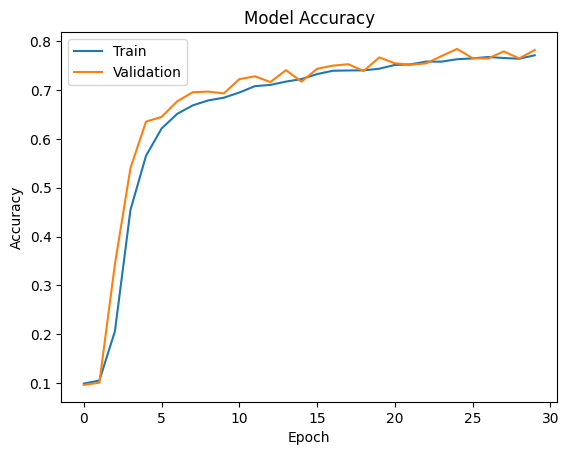

In [290]:
# Plot accuracies
plt.plot(history_nn2.history['accuracy'])
plt.plot(history_nn2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


I can see from the above plot that the model performs relatively well on the train and validation data with an accuracy of approximately 80%

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [291]:
# Evaluating the model on the test data
accuracy_nn2 = ann_model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)


563/563 - 1s - loss: 0.7205 - accuracy: 0.7769 - 1s/epoch - 2ms/step


In the above output, I see that
I see in the above output that it took 1 second to process one epoch. After processing all batches, we got a loss score of 0.72. The model correctly predicted 77.69% of the training samples. It took approximately 1 seconds on average to process one epoch. It took 2 milliseconds to process one mini-batch.

In [292]:
# Generating the Predictions using the test data
y_pred_nn2 = ann_model_2.predict(X_test_normalized)

# Convert raw model predictions of y_pred into class lables for multi-class classification
# When setting axis=-1, argmax() operation is applied along the last dimension of the y_pred array, which corresponds to classes
# argmax function  is used to find the index of the maximum value in a given array in a given specified access
y_pred_nn2_arg = np.argmax(y_pred_nn2, axis=-1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [293]:
# Convert y_test into a single label
y_test_nn2_arg=np.argmax(y_test_encoded,axis=-1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

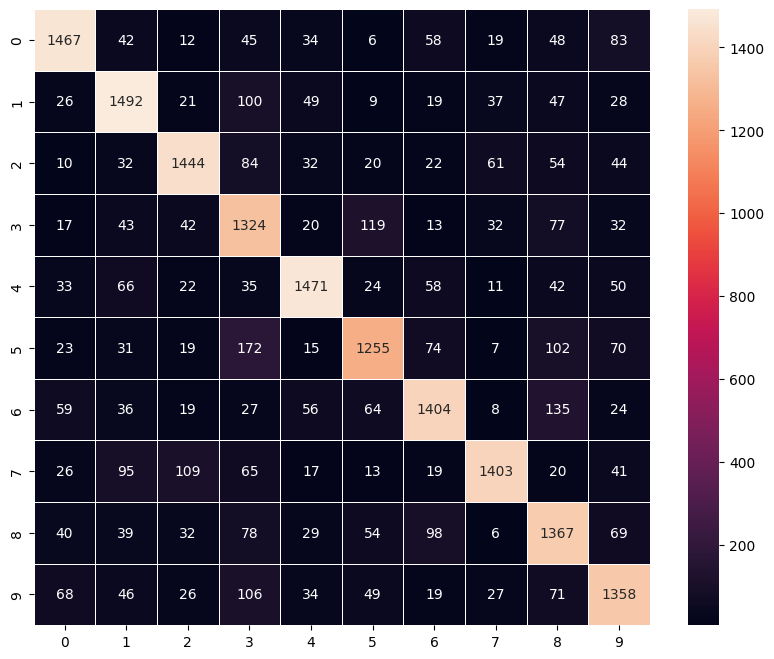

In [294]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_nn2_arg,y_pred_nn2_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In the above plot, I see that the digit 8 was accurately predicted 1367 times. There were 78 times when the number 3 was identified as the number 8.

**Final Observations:**

The total number of trainable parameters in the ANN model 1 were: 68,010

The total number of trainable parameters in the ANN model 2 were: 310,186

The first model is less complex than the second model because it has a lower number of trainable parameters.

The second ann model has more nodes than the first ann model. The second ann model has three more dense layers than the first model. While the second model has a dropout layer and a batch normalization layer, the first model doesn't have either. The second model has a smaller learning rate than the first model.

The second model has a higher accuracy, 77.69%, than the first model, 60.79%. The second model has a smaller loss score, 0.72, than the first model, 1.22. Both models took 1 second to process one epoch on average.

Among these two models, I would choose the ANN model 2 because it has a higher accuracy and a smaller loss score than the first model while having the same epoch processing time as the first model.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [295]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [296]:
import h5py

In [297]:
# Define path for .h5 file
path = '/content/drive/MyDrive/Colab_Notebooks/SVHN_single_grey1.h5'

#The data is provided as a h5 file so we need to extract the dataset
file = h5py.File(path, 'r')

In [298]:
# Split into train and test
X_test = np.array(file['X_test'])
y_test = np.array(file['y_test'])
X_train = np.array(file['X_train'])
y_train = np.array(file['y_train'])

Check the number of images in the training and the testing dataset.

In [299]:
# Display shape of X_train
X_train.shape

(42000, 32, 32)

In [300]:
# Display shape of y_train
y_train.shape

(42000,)

In [301]:
# Display shape of X_test
X_test.shape

(18000, 32, 32)

In [302]:
# Diplay shape of y_test
y_test.shape

(18000,)

**Observation:**
I see that train data has a total of 42000 images. The x_train data has images with 32x32 pixels.
The test data has a total of 18000 images. The x_test data has images with 32x32 pixels.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [303]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [304]:
y_train[0]

2

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [305]:
# Reshape dataset to have a single channel - when we have grey scale. If we had three colors, we would have three channels
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))

Normalize inputs from 0-255 to 0-1

In [306]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Print New shape of Training and Test

In [307]:
# Print shape of normalized training set
X_train_normalized.shape

(42000, 32, 32, 1)

In [308]:
# Print shape of normalized testing set
X_test_normalized.shape

(18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [309]:
# One-hot encode the labels in y_train
y_train_encoded = tf.keras.utils.to_categorical(y_train)

# Print shape encoded y_train
y_train_encoded.shape

(42000, 10)

In [310]:
# One-hot encode the labels in y_test
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Print shape encoded y_test
y_test_encoded.shape

(18000, 10)

**Observation:**
I see that target variable is a one-hot encoded vector

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [311]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [312]:
def cnn_model_1():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Conv2D layer performs a 2D convolutional operation on the input data.
  # 2D convolutional layer is used to learn spatial patterns and features from images
  # There are 16 filters in the convolutional layer. Each one will detect different patterns in the input data
  # Padding is applied before the convolution operation. The same type of padding ensures the output feature map has the same spatial dimensions as the input.
  # Padding pads the input data with zeros, so that the convolution operation does not shrink the spatial dimensions
  # Input_shape specifies the shape of the input data expected by this layer
  model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 1)))

  # Add a LeakyRelu layer with the slope equal to 0.1
  # LeakyReLU introduces a small slope for negative input values, which ensures neurons remain active during transformation
  model.add(LeakyReLU(0.1))

  # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # A max-pooling layer with a pool size of 2x2 (this is the pooling window)
  # This layer reduces the spatial dimensions of the input data. This layer effectively downsamples the feature maps
  # This layer reduces the number of parameters and computation in the model while keeping the most important information in the feature maps
  # This layer introduces a degree of translational invariance, which makes the model more robut to small translations in the input data
  model.add(MaxPooling2D((2, 2), padding = 'same'))

  # Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
  # This layer is used to transition between convolutional and fully connected layers
  # This layer reshapes the multidimensional feature maps into a one-dimensional vector
  model.add(Flatten())

  # Add a dense layer with 32 nodes
  model.add(Dense(32))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
  model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


  return model



In [313]:
# Call the nn_model_1 function and store the model in a new variable
cnn_model = cnn_model_1()

# Generating the summary of the model
cnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [314]:
# Fit the model on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20. Store the model building history to use later for visualization.

history_cnn1 = cnn_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            shuffle=True,
            batch_size=32,
            verbose=1
)


Epoch 1/20
1050/1050 [==============================] - 7s 5ms/step - loss: 1.1102 - accuracy: 0.6425 - val_loss: 0.6850 - val_accuracy: 0.7990
Epoch 2/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.5940 - accuracy: 0.8278 - val_loss: 0.5724 - val_accuracy: 0.8362
Epoch 3/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.5129 - accuracy: 0.8476 - val_loss: 0.5668 - val_accuracy: 0.8381
Epoch 4/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.4505 - accuracy: 0.8657 - val_loss: 0.4894 - val_accuracy: 0.8606
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.4009 - accuracy: 0.8775 - val_loss: 0.4925 - val_accuracy: 0.8567
Epoch 6/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3583 - accuracy: 0.8912 - val_loss: 0.4953 - val_accuracy: 0.8538
Epoch 7/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.3204 - accuracy: 0.9015 - val_loss: 0.4775 - val_accuracy:

### **Plot the Training and Validation Accuracies and Write your observations.**

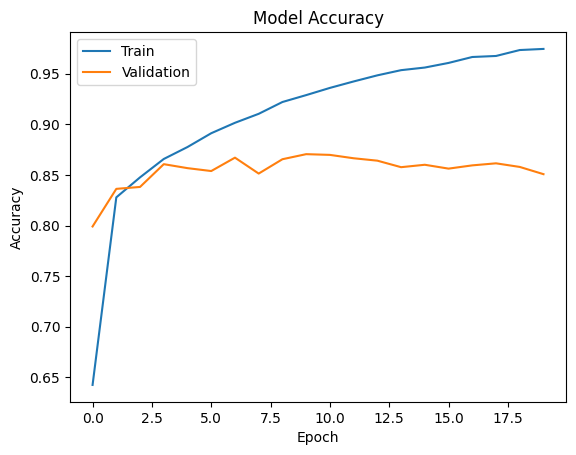

In [315]:
# Plot accuracies
plt.plot(history_cnn1.history['accuracy'])
plt.plot(history_cnn1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In the above plot, I see the model performs better in the training data, with an accuracy of approximately 95%, than the validation data, which has an accuracy of approximately 85%

In [316]:
# Evaluating the model on the test data
accuracy_cnn1 = cnn_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

563/563 - 2s - loss: 0.8608 - accuracy: 0.8512 - 2s/epoch - 3ms/step


In the above output, I see that I see in the above output that it took 1 second to process one epoch. After processing all batches, we got a loss score of 0.86. The model correctly predicted 85.12% of the training samples. It took approximately 2 seconds on average to process one epoch. It took 3 milliseconds to process one mini-batch.

In [317]:
# Generating the Predictions using the test data
y_pred_cnn1=cnn_model.predict(X_test_normalized)

563/563 [==============================] - 1s 2ms/step


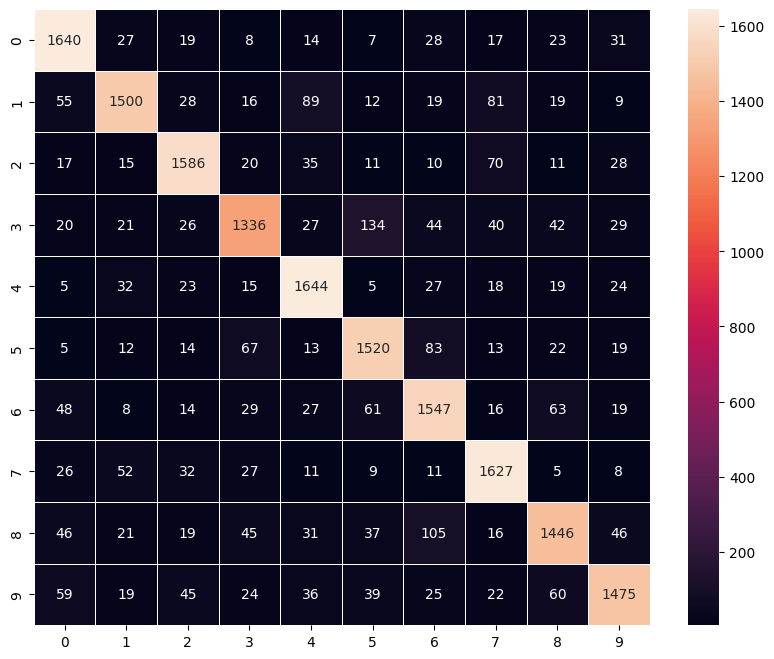

In [318]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_cnn1_arg=np.argmax(y_pred_cnn1,axis=1)
y_test_cnn1_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_cnn1_arg,y_pred_cnn1_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observations:**
In the above plot, I see that number eight was correctly identified 1446 times. I also see that there were 45 times when the number 3 was identified as an 8.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [319]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [320]:
def cnn_model_2():
  # Intializing a sequential model
  model = Sequential()

  #First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
  model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 1)))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # Add a max-pooling layer with a pool size of 2x2
  model.add(MaxPooling2D(2, 2))

  # Batch Normalization layer
  model.add(BatchNormalization())

  # Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # Add a max-pooling layer with a pool size of 2x2
  model.add(MaxPooling2D(2, 2))

  # Add a BatchNormalization layer
  model.add(BatchNormalization())

  # Flatten the output from the previous layer
  model.add(Flatten())

  # Add a dense layer with 32 nodes
  model.add(Dense(32))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # Add a dropout layer with the rate equal to 0.5
  model.add(Dropout(0.5))

  # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
  model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


  return model


In [321]:
# Call the nn_model_1 function and store the model in a new variable
cnn_model_2 = cnn_model_2()

# Generating the summary of the model
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [322]:
# Fit the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30. Store the model building history to use later for visualization.
history_cnn2 = cnn_model_2.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            shuffle=True,
            batch_size=128,
            verbose=1
)

Epoch 1/30
263/263 [==============================] - 6s 11ms/step - loss: 1.3087 - accuracy: 0.5601 - val_loss: 2.3705 - val_accuracy: 0.1139
Epoch 2/30
263/263 [==============================] - 3s 11ms/step - loss: 0.6507 - accuracy: 0.8015 - val_loss: 0.6911 - val_accuracy: 0.8146
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 0.5193 - accuracy: 0.8413 - val_loss: 0.4519 - val_accuracy: 0.8715
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4436 - accuracy: 0.8650 - val_loss: 0.4283 - val_accuracy: 0.8770
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.3958 - accuracy: 0.8796 - val_loss: 0.4522 - val_accuracy: 0.8636
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3653 - accuracy: 0.8888 - val_loss: 0.4322 - val_accuracy: 0.8707
Epoch 7/30
263/263 [==============================] - 3s 12ms/step - loss: 0.3419 - accuracy: 0.8938 - val_loss: 0.3665 - val_accuracy: 0.8986
E

### **Plot the Training and Validation accuracies and write your observations.**

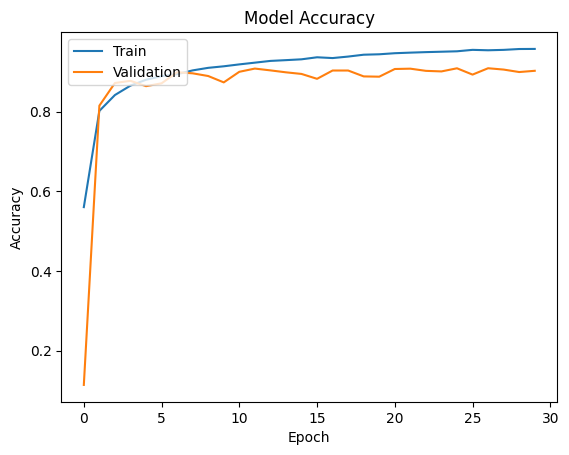

In [323]:
# Plot accuracies
plt.plot(history_cnn2.history['accuracy'])
plt.plot(history_cnn2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
In the above plot, I see that the model performs relatively well on the train and validation data with an accuracy of approximately 90%

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [324]:
# Evaluating the model on the test data
accuracy_cnn2 = cnn_model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

563/563 - 1s - loss: 0.4884 - accuracy: 0.9052 - 1s/epoch - 2ms/step


In the above output, I see that I see in the above output that it took 1 second to process one epoch. After processing all batches, we got a loss score of 0.49. The model correctly predicted 90.52% of the training samples. It took approximately 1 seconds on average to process one epoch. It took 2 milliseconds to process one mini-batch.

In [325]:
# Generating the Predictions using the test data
y_pred_cnn2=cnn_model_2.predict(X_test_normalized)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [326]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_cnn2_arg=np.argmax(y_pred_cnn2,axis=1)
y_test_cnn2_arg=np.argmax(y_test_encoded,axis=1)

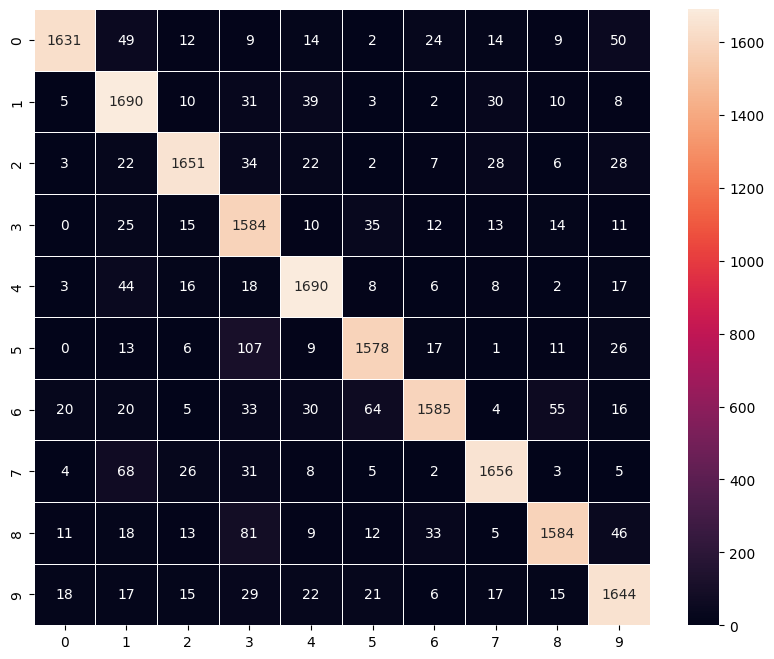

In [327]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_cnn2_arg,y_pred_cnn2_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In the above plot, I see that number 8 was correctly identified 1584 times. On the other hand, I see there were 81 times when number 3 was mistaken for number 8

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**


The total number of trainable parameters in the CNN model 1 were: 267,306

The total number of trainable parameters in the CNN model 2 were: 164,170

The first model is less complex than the second model because it has a lower number of trainable parameters.

The second cnn model has two dense layers more than the first cnn model. The second model has two additional batch normalization layers, two LeakyReLU layers, one max-pooling layer, and a dropout layer. The second model has more epochs than the first model.

The second cnn model has a greater accuracy, 90.52%, than the first model, 85.12%. The second cnn model has a smaller loss score, 0.49, than the first model, 0.86. The second model took more time, 2 seconds, to process one epoch than the first model, 1 second.

Considering that the first model performs better in the training data than in the validation data, I can conclude that the the first model is overfitting. Adding regularization and dropout layers, like the second model does, would help address this.

Among these two models, I would choose the CNN model 2 because it has a higher accuracy and smaller loss score than the first model. It is also built to avoid overfitting because it has regulatization and dropout layers.

Additionally, CNNs are more suitable for image recognition than ANNs because CNNs are specifically designed for processing grid-like data, like images. CNNs learn hierarchical patterns and features from input data, regardless of their location. CNNs also don't need extensive manual feature engineering, which is why I would ultimately recommend using the CNN model 2.